In [1]:
import os
import poseidon_core
import numpy as np
import matplotlib.pyplot as plt

 Platform does not have any supported GPU!
 Platform verification failed
 platform is not supported by cufile
 cuFile initialization failed


In [2]:
# file_path = '/home/rmccune/Documents/poseidon/data/lidar/combined_point_cloud_down_east.laz'
file_path = "data/lidar/Job1051007_34077_04_88.laz"

# min_x_extent = 847809.694
# max_x_extent = 847973.874
# min_y_extent = 127254.634
# max_y_extent = 127450.141

min_x_extent = 712160
max_x_extent = 712230
min_y_extent = 33100
max_y_extent = 33170

grid_gen = poseidon_core.GridGenerator(
    file_path,
    min_x_extent,
    max_x_extent,
    min_y_extent,
    max_y_extent,
    lidar_units="feet",
)

resolution = 0.05  # meters

pts_array = grid_gen.create_point_array()
grid_x, grid_y, grid_z = grid_gen.gen_grid(
    resolution, pts_array, grid_descriptor="carolina_beach"
)


--- Starting grid generation for 'carolina_beach' at 0.05m ---
  [IO] Using existing directory: data/generated_grids
  [GRID] Generating grid coordinates...
    X Extent: 712160.00 to 712230.00
    Y Extent: 33100.00 to 33170.00
    Initial grid shape (before transpose): (1400, 1400)
  [GRID] Interpolating Z grid from 35549 input points...
    [WARN] 4240 grid points were outside the interpolation area (set to NaN).
  [GRID] Transposing grids to (Y, X) convention.
    Final grid shape: (1400, 1400)
  [IO] Saving compressed Zarr arrays (mode='w', overwriting)...
    X -> data/generated_grids/carolina_beach_grid_x_0.05m.zarr
    Y -> data/generated_grids/carolina_beach_grid_y_0.05m.zarr
    Z -> data/generated_grids/carolina_beach_grid_z_0.05m.zarr
--- Grid generation successful in 0.81 seconds. ---


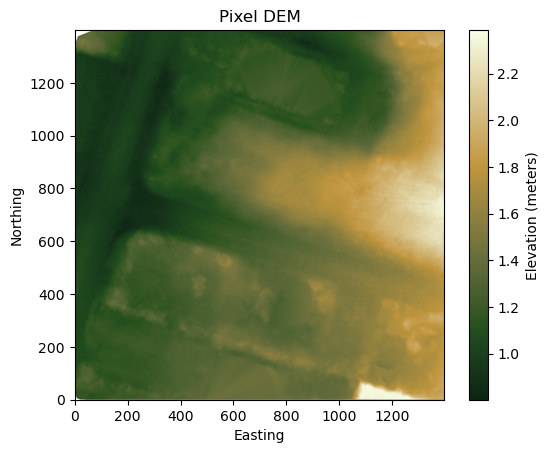

In [3]:
grid_gen.plot_elev_grid(grid_z)

In [4]:
intrinsics = np.array(
    [
        3040,  # number of pixel columns
        4056,  # number of pixel rows
        1503.0136,  # U component of principal point
        2163.4301,  # V component of principal point
        2330.4972,  # U component of focal length
        2334.0017,  # V component of focal length
        -0.3587,  # radial distortion
        0.1388,  # radial distortion
        -0.0266,  # radial distortion
        -0.0046,  # tangential distortion
        0.0003,  # tangential distortion
    ]
)

# extrinsics = np.array([847955.4296, # camera x in world
#                        127408.728, # camera y in world
#                        4.4922, # camera elev in world
#                        4.38504, # azimuth
#                        1.14484, # tilt
#                        0.01305 # roll/swing
#                        ])
extrinsics = np.array(
    [
        712159.597863065,  # camera x in world
        33136.9994153273,  # camera y in world
        3.72446811607855,  # camera elev in world
        1.30039127961854,  # azimuth
        1.02781393967485,  # tilt
        -0.160877893129538,  # roll/swing
    ]
)

In [5]:
rectifier = poseidon_core.ImageRectifier(
    intrinsics, extrinsics, grid_x, grid_y, grid_z, use_gpu=True
)

[2025-11-03 14:31:20] --- Initializing ImageRectifier ---
[2025-11-03 14:31:20]   Mode: GPU (CuPy)
[2025-11-03 14:31:20]   Input grid shape: (1400, 1400)
[2025-11-03 14:31:20]   Starting distortion map computation (Ud, Vd)...
[2025-11-03 14:31:21]   ...Distortion map computation complete.
[2025-11-03 14:31:21] --- ImageRectifier Initialization Complete ---


In [7]:
rectifier.merge_rectify_folder(
    "/home/rmccune/Documents/poseidon/data/test_rectification/labels",
    "/home/rmccune/Documents/poseidon/data/test_rectification/zarr/labels",
    labels=True,
)

[2025-11-03 14:32:27] 
=== Starting Batch Rectification ===
[2025-11-03 14:32:27]   Source folder: /home/rmccune/Documents/poseidon/data/test_rectification/labels
[2025-11-03 14:32:27]   Output Zarr store: /home/rmccune/Documents/poseidon/data/test_rectification/zarr/labels
[2025-11-03 14:32:27]   Found 74 images to process.
[2025-11-03 14:32:27]   Processing image 1/74: CAM_CB_03_20231002133025_predseg_labels.png
[2025-11-03 14:32:28]   Processing image 7/74: CAM_CB_03_20231002132425_predseg_labels.png
[2025-11-03 14:32:29]   Processing image 14/74: CAM_CB_03_20231002184225_predseg_labels.png
[2025-11-03 14:32:29]   Processing image 21/74: CAM_CB_03_20231002191225_predseg_labels.png
[2025-11-03 14:32:30]   Processing image 28/74: CAM_CB_03_20231002190625_predseg_labels.png
[2025-11-03 14:32:31]   Processing image 35/74: CAM_CB_03_20231002200625_predseg_labels.png
[2025-11-03 14:32:31]   Processing image 42/74: CAM_CB_03_20231002173025_predseg_labels.png
[2025-11-03 14:32:32]   Process

In [9]:
import zarr

In [ ]:
new_root = zarr.open(
    "/home/rmccune/Documents/poseidon/data/test_rectification/zarr/labels",
    mode="r",
)
old_root = zarr.open(
    "/home/rmccune/Documents/poseidon/data/test_rectification/zarr/labels_rects",
    mode="r",
)
new_method = new_root["CAM_CB_03_20231002201225_predseg_labels_rectified"]
old_method = old_root["CAM_CB_03_20231002201225_predseg_labels_rectified"]
new_method = new_method[:]
old_method = old_method[:]

In [58]:
new_method = new_root["CAM_CB_03_20231002201225_predseg_labels_rectified"]
old_method = old_root["CAM_CB_03_20231002201225_predseg_labels_rectified"]
new_method = new_method[:]
old_method = old_method[:]

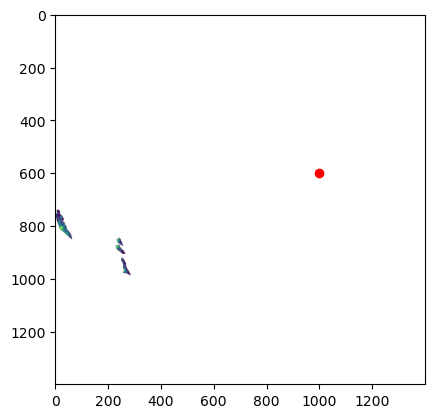

In [74]:
plt.imshow(new_method)
plt.scatter(1000, 600, c="r")
plt.show()

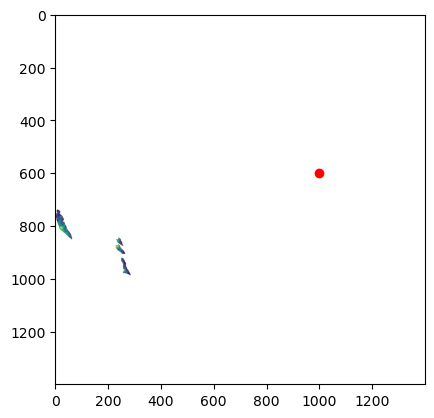

In [75]:
plt.imshow(old_method)
plt.scatter(1000, 600, c="r")
plt.show()

In [76]:
diff_mask = new_method != old_method
num_different = np.sum(diff_mask)

print(f"Found {num_different} differing elements.")

if num_different > 0:
    # Get the coordinates
    diff_indices = np.where(diff_mask)
    coordinates = list(zip(*diff_indices))

    print(f"The first differing index is: {coordinates[0]}")
    print(f"  arr1 value: {new_method[coordinates[0]]}")
    print(f"  arr2 value: {old_method[coordinates[0]]}")

Found 1959890 differing elements.
The first differing index is: (np.int64(0), np.int64(0))
  arr1 value: nan
  arr2 value: nan


In [55]:
diff_mask

True

In [73]:
print(np.unique(new_method))
print(np.unique(old_method))

[0.00000000e+00 2.62559844e-06 2.82358977e-05 ... 6.68877673e-02
 6.77665355e-02            nan]
[0.00000000e+00 7.18050018e-06 3.25274124e-05 ... 7.26793410e-02
 7.35581092e-02            nan]


In [34]:
# Create a boolean array of differences
diff_mask = new_method != old_method

# Count the number of differing elements
num_different = np.sum(diff_mask)

print(f"Total number of differing elements: {num_different}")

Total number of differing elements: 1


In [77]:
diff_indices = np.where(
    ~(
        (new_method == old_method)
        | (np.isnan(new_method) & np.isnan(old_method))
    )
)
# diff_indices = np.where(new_method != arr2)

# --- Extract the single index ---
# np.where returns a tuple of arrays, one for each dimension.
# We can re-zip them to get the coordinate.
coordinates = list(zip(*diff_indices))

if len(coordinates) == 1:
    index_tuple = coordinates[0]
    print(f"The single differing index is: {index_tuple}")
    print(f"Value in arr1: {new_method[index_tuple]}")
    print(f"Value in arr2: {old_method[index_tuple]}")
elif len(coordinates) == 0:
    print("No differences found.")
else:
    print(
        f"Found {len(coordinates)} differences. The first is: {coordinates[0]}"
    )

Found 3888 differences. The first is: (np.int64(742), np.int64(13))


In [ ]:
if num_different > 0:
    print("\n--- Comparing first 5 different values ---")
    for i in range(min(5, num_different)):
        idx = tuple(dim[i] for dim in diff_indices)

        val1 = new_method[idx]
        val2 = old_method[idx]

        print(f"Index {idx}: new_method has {val1}, arr2 has {val2}")

    # You can also get summary statistics on the differences
    # This only works for numeric types
    if np.issubdtype(new_method.dtype, np.number) and np.issubdtype(
        old_method.dtype, np.number
    ):
        # Create an array of the actual difference values
        diff_values = new_method[diff_mask] - old_method[diff_mask]

        print("\n--- Statistics on Differences ---")
        print(f"  Max absolute difference: {np.max(np.abs(diff_values))}")
        print(f"  Min absolute difference: {np.min(np.abs(diff_values))}")
        print(f"  Mean absolute difference: {np.mean(np.abs(diff_values))}")

In [25]:
nan_in_1 = np.sum(np.isnan(new_method))
nan_in_2 = np.sum(np.isnan(old_method))

if nan_in_1 > 0 or nan_in_2 > 0:
    print(
        f"\nWarning: Found {nan_in_1} NaNs in new_method and {nan_in_2} NaNs in old_method."
    )

    # To check for equality *while* treating NaNs as equal, use this:
    if np.array_equal(new_method, old_method, equal_nan=True):
        print("✅ Arrays are equal (treating NaNs as equal).")
    else:
        print("❌ Arrays are still different, even when accounting for NaNs.")

In [65]:
processor = poseidon_core.DepthMapProcessor(
    grid_z,
    pond_edge_elev_plot_dir="/home/rmccune/Documents/poseidon/data/test_rectification/plots",
)

In [69]:
processor.process_depth_maps(
    "/home/rmccune/Documents/poseidon/data/test_rectification/zarr/labels",
    "/home/rmccune/Documents/poseidon/data/test_rectification/zarr/new_depth_maps",
)

[2025-11-03 15:02:04] 
=== Starting Depth Map Generation ===
[2025-11-03 15:02:04]   Source Zarr directory: /home/rmccune/Documents/poseidon/data/test_rectification/zarr/labels
[2025-11-03 15:02:04]   Output Zarr directory: /home/rmccune/Documents/poseidon/data/test_rectification/zarr/new_depth_maps
[2025-11-03 15:02:04]   Found 74 rectified label arrays to process.
[2025-11-03 15:02:04]   Processing file 1/74: CAM_CB_03_20231002193025_predseg_labels_rectified
[2025-11-03 15:02:14]   Processing file 7/74: CAM_CB_03_20231002145425_predseg_labels_rectified
[2025-11-03 15:02:25]   Processing file 14/74: CAM_CB_03_20231002174825_predseg_labels_rectified
[2025-11-03 15:02:35]   Processing file 21/74: CAM_CB_03_20231002161225_predseg_labels_rectified
[2025-11-03 15:02:46]   Processing file 28/74: CAM_CB_03_20231002153625_predseg_labels_rectified
[2025-11-03 15:02:55]   Processing file 35/74: CAM_CB_03_20231002165425_predseg_labels_rectified
[2025-11-03 15:03:06]   Processing file 42/74: CAM_

In [97]:
new_root = zarr.open(
    "/home/rmccune/Documents/poseidon/data/test_rectification/zarr/new_depth_maps",
    mode="r",
)
old_root = zarr.open(
    "/home/rmccune/Documents/poseidon/data/test_rectification/zarr/depth_maps",
    mode="r",
)
new_method = new_root[
    "CAM_CB_03_20231002160625_predseg_labels_rectified_depth_map_median"
]
old_method = old_root[
    "CAM_CB_03_20231002160625_predseg_labels_rectified_depth_map_median"
]
new_method = new_method[:]
old_method = old_method[:]

In [71]:
new_method

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(1400, 1400))

In [72]:
old_method

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(1400, 1400))

In [79]:
old_method.dtype

dtype('<f8')

In [81]:
# Use equal_nan=True to treat NaNs in the same spot as equal
are_equal = np.array_equal(new_method, old_method, equal_nan=True)

if are_equal:
    print("✅ The arrays are identical.")
else:
    print("❌ The arrays have differences.")

❌ The arrays have differences.


In [82]:
# This mask finds only true differences
diff_mask = ~(
    (new_method == old_method) | (np.isnan(new_method) & np.isnan(old_method))
)

# Get the total count of true differences
num_different = np.sum(diff_mask)
print(f"Found {num_different} *true* differing elements.")

if num_different > 0:
    # Get the coordinates
    diff_indices = np.where(diff_mask)
    coordinates = list(zip(*diff_indices))

    print("\n--- First 5 Differences ---")
    for i in range(min(5, num_different)):
        idx = coordinates[i]
        print(
            f"  Index {idx}: arr1 has {new_method[idx]}, arr2 has {old_method[idx]}"
        )

Found 3888 *true* differing elements.

--- First 5 Differences ---
  Index (np.int64(742), np.int64(13)): arr1 has 0.0, arr2 has 6.535127223161741e-05
  Index (np.int64(742), np.int64(14)): arr1 has 0.0, arr2 has 0.0006110538636073803
  Index (np.int64(743), np.int64(9)): arr1 has 0.0, arr2 has 3.252741244785806e-05
  Index (np.int64(743), np.int64(10)): arr1 has 0.0, arr2 has 0.00016913943444618607
  Index (np.int64(743), np.int64(11)): arr1 has 0.0, arr2 has 0.0005201034325605924


In [84]:
are_close_enough = np.allclose(new_method, old_method, equal_nan=True)

if are_close_enough:
    print("✅ The arrays are identical (within float tolerance).")
else:
    print("❌ The arrays have differences.")

❌ The arrays have differences.


In [85]:
# 1. Create a mask of all elements that are "close enough"
#    This treats NaNs in the same spot as "close" (equal_nan=True)
is_close_mask = np.isclose(new_method, old_method, equal_nan=True)

# 2. Invert the mask to find only the "truly different" elements
diff_mask = ~is_close_mask

# 3. Get the count and coordinates
num_different = np.sum(diff_mask)
print(f"Found {num_different} *significant* differing elements.")

if num_different > 0:
    # Get the coordinates
    diff_indices = np.where(diff_mask)
    coordinates = list(zip(*diff_indices))

    print("\n--- First 5 Significant Differences ---")
    for i in range(min(5, num_different)):
        idx = coordinates[i]
        print(
            f"  Index {idx}: arr1 has {new_method[idx]}, arr2 has {old_method[idx]}"
        )

Found 3888 *significant* differing elements.

--- First 5 Significant Differences ---
  Index (np.int64(742), np.int64(13)): arr1 has 0.0, arr2 has 6.535127223161741e-05
  Index (np.int64(742), np.int64(14)): arr1 has 0.0, arr2 has 0.0006110538636073803
  Index (np.int64(743), np.int64(9)): arr1 has 0.0, arr2 has 3.252741244785806e-05
  Index (np.int64(743), np.int64(10)): arr1 has 0.0, arr2 has 0.00016913943444618607
  Index (np.int64(743), np.int64(11)): arr1 has 0.0, arr2 has 0.0005201034325605924


In [100]:
# 3. Now, re-run the analysis
print("\n--- Running Analysis ---")

# Rename for clarity
new_method_arr = new_method
old_method_arr = old_method

# Re-create the original mask of ALL significant differences
is_close_mask = np.isclose(new_method_arr, old_method_arr, equal_nan=True)
diff_mask = ~is_close_mask
total_diffs = np.sum(diff_mask)
print(f"Total significant differences found (all types): {total_diffs}")

# Create the user's new filter mask
user_filter_mask = diff_mask & (abs(old_method_arr - new_method_arr) > 0.011)

# Get the count and coordinates for this specific subset
filtered_diff_indices = np.where(user_filter_mask)
filtered_coordinates = list(zip(*filtered_diff_indices))
num_filtered_diffs = len(filtered_coordinates)

print(f"\nFound {num_filtered_diffs} differences where:")
print(f"  1. new_method != old_method")
print(f"  2. old_method (arr2) was > 0.02")

# Inspect the first 5 of these filtered differences
print(
    "\n--- Inspecting First 5 'Significant' Differences (Old Value > 0.01) ---"
)

if num_filtered_diffs == 0:
    print("\nNo differences were found matching your criteria.")
else:
    for i in range(max(5, num_filtered_diffs)):
        idx = filtered_coordinates[i]
        val_new = new_method_arr[idx]
        val_old = old_method_arr[idx]
        abs_diff = np.abs(val_new - val_old)

        print(f"\n  Index {idx}:")
        print(f"    new_method (arr1): {val_new}")
        print(f"    old_method (arr2): {val_old}")
        print(f"    Absolute Difference: {abs_diff}")


--- Running Analysis ---
Total significant differences found (all types): 1049

Found 152 differences where:
  1. new_method != old_method
  2. old_method (arr2) was > 0.02

--- Inspecting First 5 'Significant' Differences (Old Value > 0.01) ---

  Index (np.int64(645), np.int64(179)):
    new_method (arr1): 0.0
    old_method (arr2): 0.012554154709118026
    Absolute Difference: 0.012554154709118026

  Index (np.int64(645), np.int64(180)):
    new_method (arr1): 0.0
    old_method (arr2): 0.011741127746350721
    Absolute Difference: 0.011741127746350721

  Index (np.int64(646), np.int64(177)):
    new_method (arr1): 0.0
    old_method (arr2): 0.014655203189857469
    Absolute Difference: 0.014655203189857469

  Index (np.int64(646), np.int64(178)):
    new_method (arr1): 0.0
    old_method (arr2): 0.01369378224425466
    Absolute Difference: 0.01369378224425466

  Index (np.int64(646), np.int64(179)):
    new_method (arr1): 0.0
    old_method (arr2): 0.013411824490752622
    Absolut